# Toxic: LDA

Toxic words should be classified into one of six groups: Toxic, Severe Toxic, Obscene, Threat, Insult and Identity Hate. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from gensim import corpora, models, similarities, matutils
from sklearn import datasets
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

from wordcloud import WordCloud

import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle('../data/toxictrain.pkl')
print(df.shape)
# df.head()

(159571, 30)


In [3]:
df_t = df[df['rating']>0]
df_nt = df[df['rating']==0]
print(df_t.shape, df_nt.shape)

(16225, 30) (143346, 30)


### Assumptions

In [4]:
categories = ['clean','toxic','severe_toxic','obscene','threat','insult','identity_hate']

In [5]:
def create_wordcloud(text,width,height,max_words,title):
    wordcloud = WordCloud(width=width,height=height,max_words=max_words).generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title,fontweight='bold',fontsize=16)

def topics_wordcloud(data, num_topics,ngram_range, max_words, label):
    fig = plt.figure(figsize=(30,15))
    topics_dict = {}
    count_vectorizer = CountVectorizer(ngram_range=ngram_range,  stop_words='english', max_df=0.02, token_pattern="\\b[a-z][a-z]+\\b")
    count_vectorizer.fit(data)
    counts = count_vectorizer.transform(data).transpose()
    corpus = matutils.Sparse2Corpus(counts)
    id2word = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())
    lda = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, passes=10) # minimum_probability=0.03, 
    lda_corpus = lda[corpus]
    lda_docs = [doc for doc in lda_corpus]
    topics = lda.print_topics(num_words=200)
    i = 0
    for topic in topics:
        topics_dict[topic[0]] = lda_docs # , lda.log_perplexity
        nrows = math.ceil(num_topics / 3)
        ax = fig.add_subplot(nrows,3,i+1)
        topics_dict[topic[0]] = topic
        title = " Topic: " + str(topic[0])
        filepath = '../charts/' + label + str(topic[0]) + '.png'
        create_wordcloud(topic[1],400,200,max_words,title)
        i+=1
    plt.savefig(filepath)
    print("Chart saved at {}".format(filepath))
    return topics_dict

Chart saved at ../charts/6t12n5.png


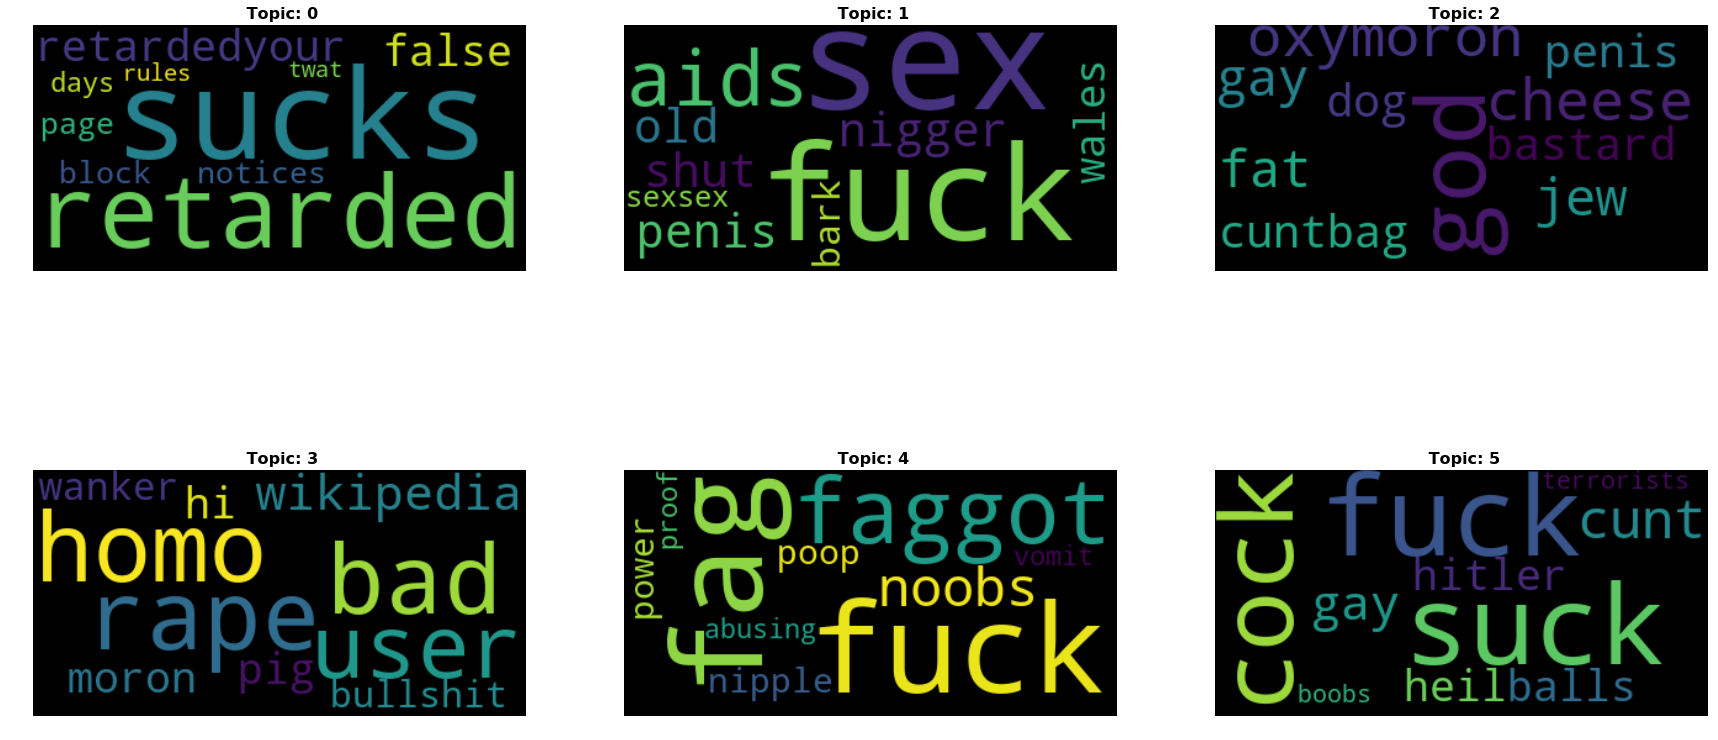

In [6]:
td1 = topics_wordcloud(df_t.comment_text, 6,(1,2),10,'6t12n')
# td1

In [7]:
td1

{0: (0,
  '0.006*"retarded" + 0.004*"retarded retarded" + 0.003*"sucks" + 0.003*"gay gay" + 0.002*"rules" + 0.002*"dont care" + 0.002*"retardedyour" + 0.002*"twat" + 0.002*"care dont" + 0.002*"wikipedia hate" + 0.002*"twat twat" + 0.001*"vandalism rules" + 0.001*"rules vandalism" + 0.001*"false" + 0.001*"dickhead" + 0.001*"fggt" + 0.001*"know fggt" + 0.001*"freedom" + 0.001*"fggt know" + 0.001*"retarded retardedyour" + 0.001*"retardedyour retarded" + 0.001*"internet" + 0.001*"attention" + 0.001*"clear" + 0.001*"standards" + 0.001*"living" + 0.001*"apparently" + 0.001*"wasn" + 0.001*"days" + 0.001*"notices" + 0.001*"live" + 0.001*"expect" + 0.001*"pompous" + 0.001*"forgive" + 0.001*"retardedyour retardedyour" + 0.001*"editor" + 0.001*"fucksex" + 0.001*"fucker" + 0.001*"fucksex fucksex" + 0.001*"bollocks" + 0.001*"wp" + 0.001*"services" + 0.001*"come attention" + 0.001*"jersey" + 0.001*"bush" + 0.001*"flame" + 0.001*"forget" + 0.001*"sine" + 0.001*"verizon" + 0.001*"legion" + 0.001*"clea

Chart saved at ../charts/6t23n5.png


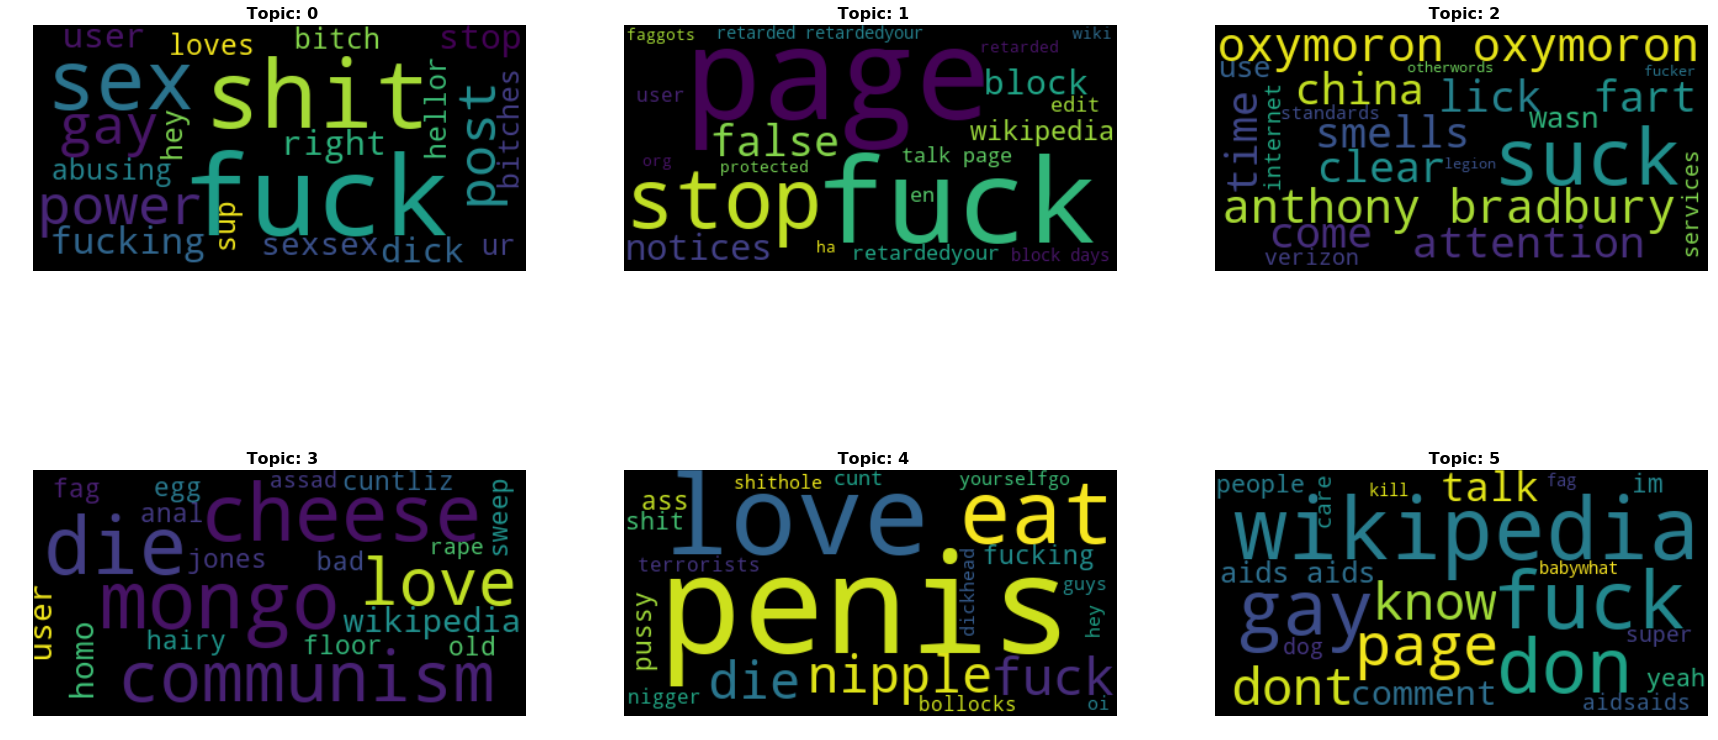

In [8]:
td2 = topics_wordcloud(df_t.comment_text, 6,(2,3),20,'6t23n')

Chart saved at ../charts/6t34n5.png


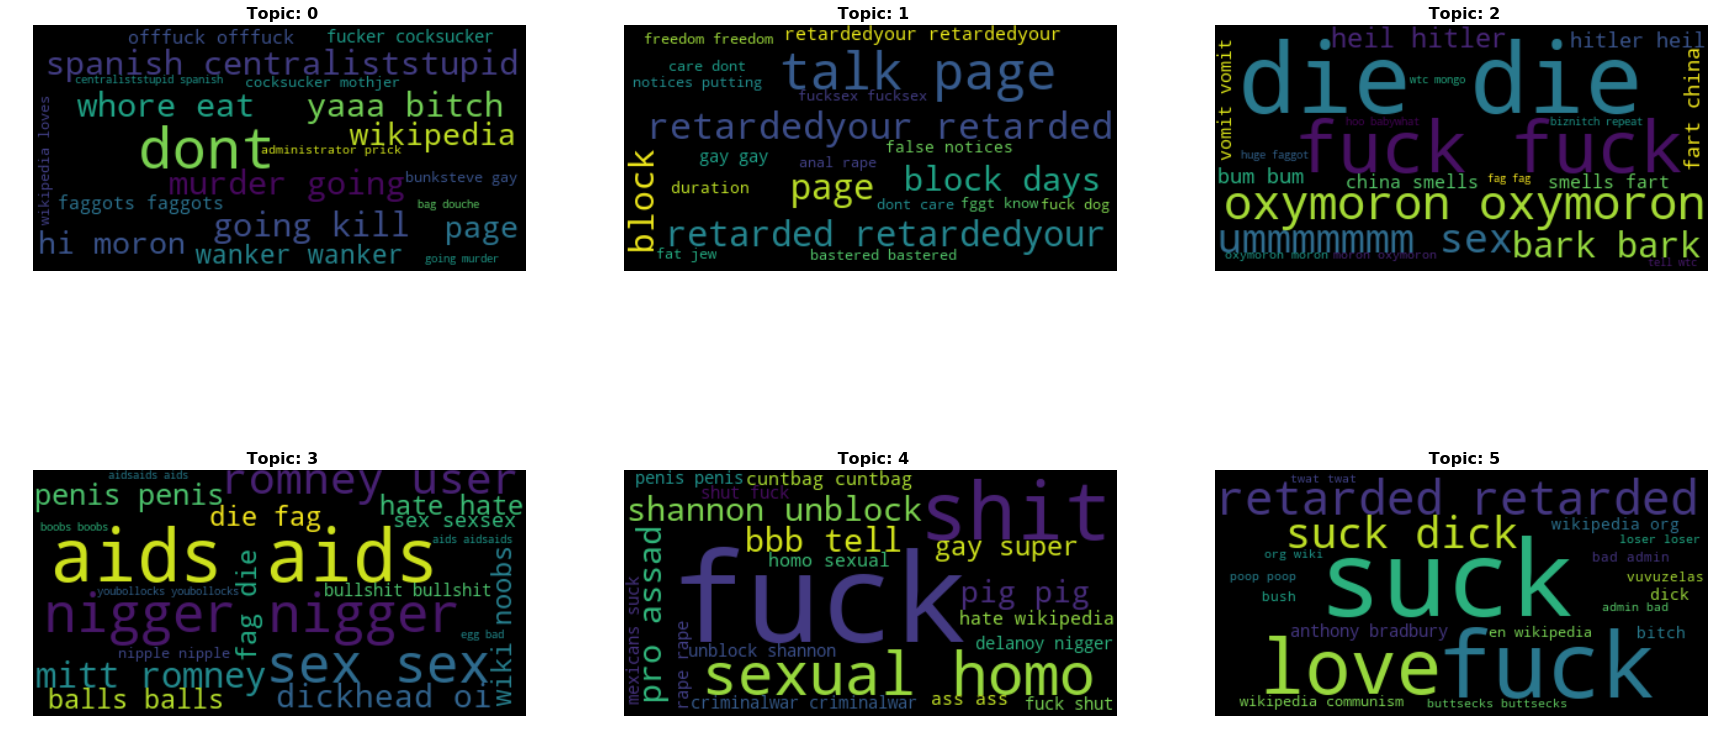

In [9]:
td3 = topics_wordcloud(df_t.comment_text, 6,(3,4),20,'6t34n')

clean
Chart saved at ../charts/clean0.png
toxic
Chart saved at ../charts/toxic0.png
severe_toxic
Chart saved at ../charts/severe_toxic0.png
obscene
Chart saved at ../charts/obscene0.png
threat
Chart saved at ../charts/threat0.png
insult
Chart saved at ../charts/insult0.png
identity_hate
Chart saved at ../charts/identity_hate0.png


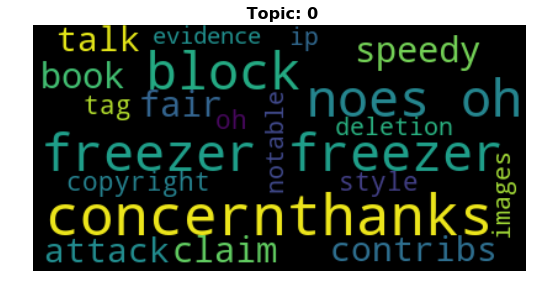

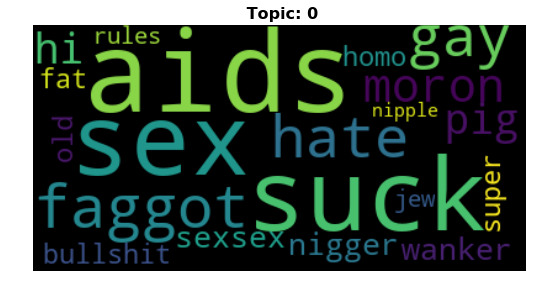

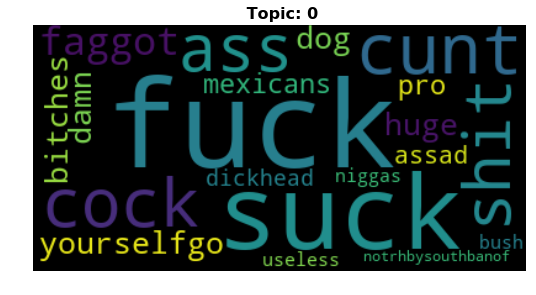

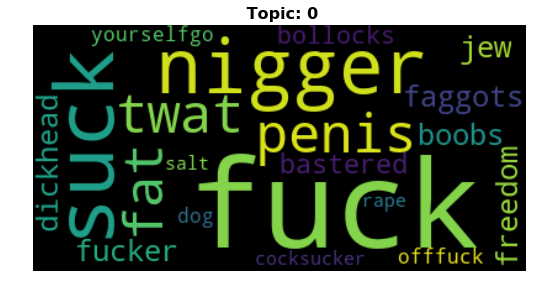

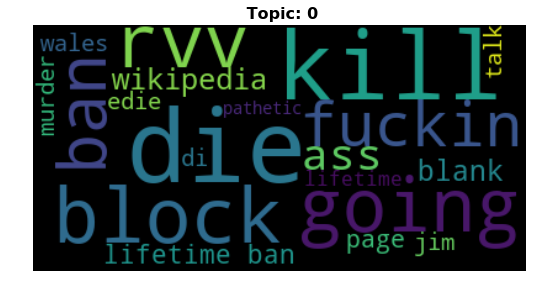

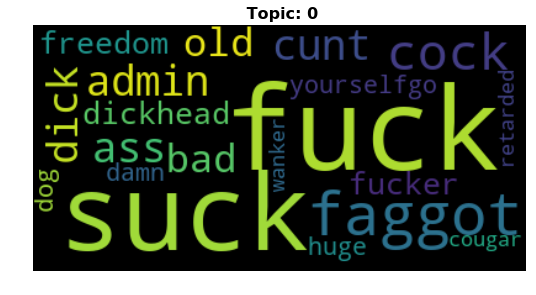

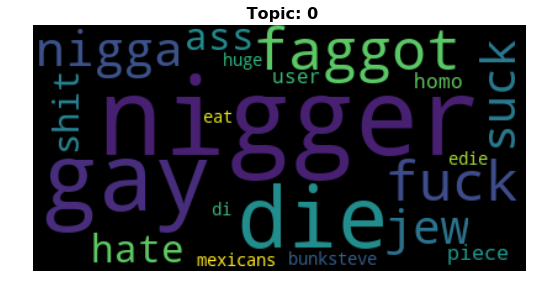

In [10]:
for category in categories:
    print(category)
    data = df[df[category]==1]
    topics_wordcloud(data.comment_text, 1,(1,3),20,category)